#**Introduction to Data Visualization with Seaborn**

Previously you learned the basics of cleaning tabular data and manipulating it into a desired format with Pandas. From there, you may want to conduct Exploratory Data Analysis to discover trends by harnessing the power of data visualization. Additionally, after your analyses are complete you will likely desire to graphically share your results in poster, presentations, and publication.

The most popular data visualization library in Python is called Matplotlib. Here we will introduce an extension of the Matplotlib library called Seaborn that greatly simplifies the process of turning DataFrames into plots.

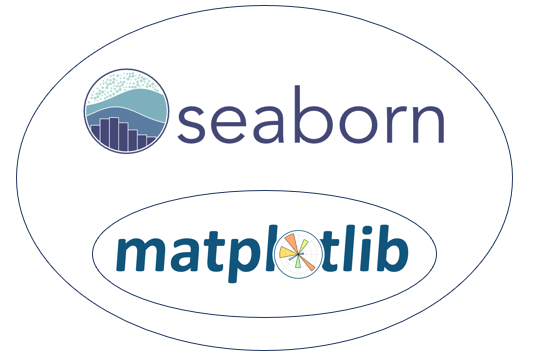

###Import the Seaborn library.

In [3]:
import pandas as pd
import seaborn as sns

###Load the ***Weekly Cumulative Estimated Number of Influenza Vaccinations Administered in Pharmacies and Physician Medical Offices, Adults 18 years and older, United States*** .csv file as a Pandas DataFrame.

This data is collected and districuted by the US Centers for Disease Control and Prevention (CDC).
For more information, see the following pages:



*   https://www.cdc.gov/flu/fluvaxview/dashboard/vaccination-administered.html
*   https://healthdata.gov/dataset/Weekly-Cumulative-Estimated-Number-of-Influenza-Va/mfrt-788y



In [4]:
df = pd.read_csv('https://data.cdc.gov/api/views/83ng-twza/rows.csv?accessType=DOWNLOAD')

In [5]:
df.head()

Influenza_Season     Week_ID Current_Season_Week_Ending_Label  \
0        2019-2020  08/10/2019                       08/05/2023   
1        2019-2020  08/10/2019                       08/05/2023   
2        2019-2020  08/10/2019                       08/05/2023   
3        2019-2020  08/17/2019                       08/12/2023   
4        2019-2020  08/17/2019                       08/12/2023   

   MMWR_Week_Order  MMWR_Year  MMWR_Week  MMWR_Day                   Setting  \
0                6       2019         32         6                  Combined   
1                6       2019         32         6                  Pharmacy   
2                6       2019         32         7  Physician Medical Office   
3                7       2019         33         6                  Combined   
4                7       2019         33         6                  Pharmacy   

    Doses  Cumulative_Doses  Location_and_Flu_Season_Order Current_Through  
0  128151            144413                             14      10/28/2023  
1  120600            134921                             24      10/28/2023  
2    7551              9492                             34      10/28/2023  
3  281834            426247                             14      10/28/2023  
4  260043            394964                             24      10/28/2023

### Check for NaN values.

In [6]:
df.isnull().sum()

Influenza_Season                    0
Week_ID                             0
Current_Season_Week_Ending_Label    0
MMWR_Week_Order                     0
MMWR_Year                           0
MMWR_Week                           0
MMWR_Day                            0
Setting                             0
Doses                               0
Cumulative_Doses                    0
Location_and_Flu_Season_Order       0
Current_Through                     0
dtype: int64

#**Plotting with Seaborn**

##**Bar Plots**


###Create a bar plot from the DataFrame showing the mean number of influenza vaccine doses administered each year.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

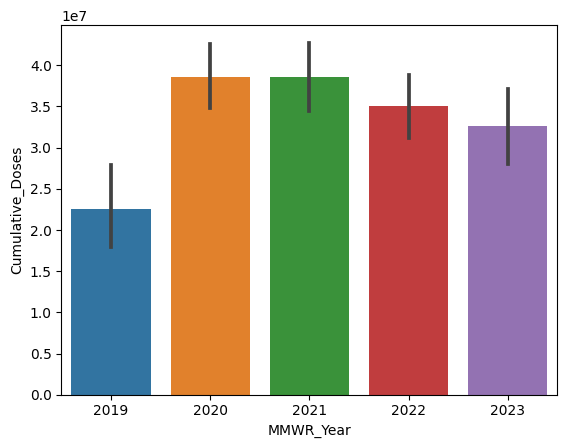

In [7]:
sns.barplot(data=df, x='MMWR_Year', y='Cumulative_Doses')

###Create a double-bar plot like above but where the mean numbers of influenza vaccine doses are separated by setting.
Notice that a key is automatically generated.


<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

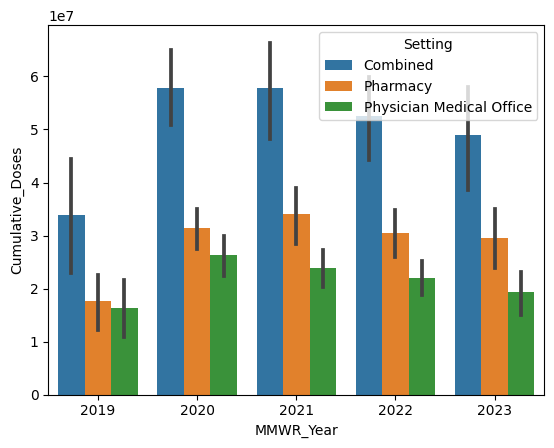

In [8]:
sns.barplot(data=df, x='MMWR_Year', y='Cumulative_Doses', hue='Setting')

###In both of these bar graphs, the bars represent sample mean and the error bars represent the 95% confidence interval of each mean. However, you can manipulate these defaults using an additional python library, NumPy.

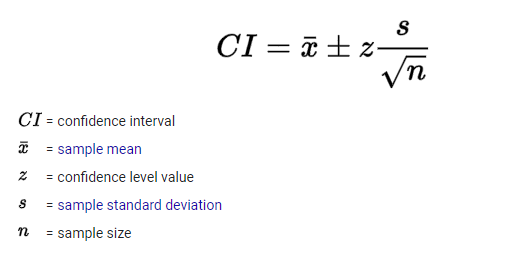

###Import the NumPy library.

In [9]:
import numpy as np

###Create a bar graph like above where each bar represents the sample median instead of sample mean.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

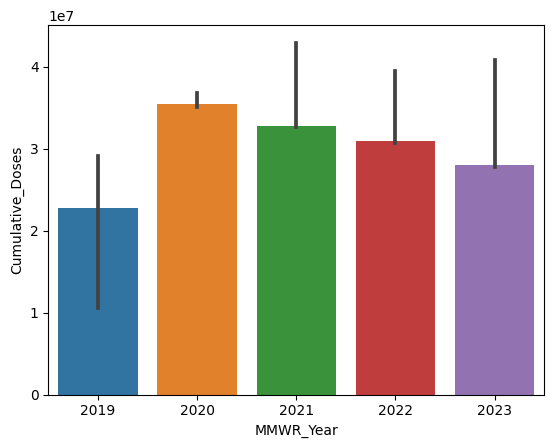

In [10]:
sns.barplot(data=df, x='MMWR_Year', y='Cumulative_Doses', estimator=np.median)

Notice how the error bars have changed too. They now represent the 95% confidence interval of each sample median instead of the sample mean.

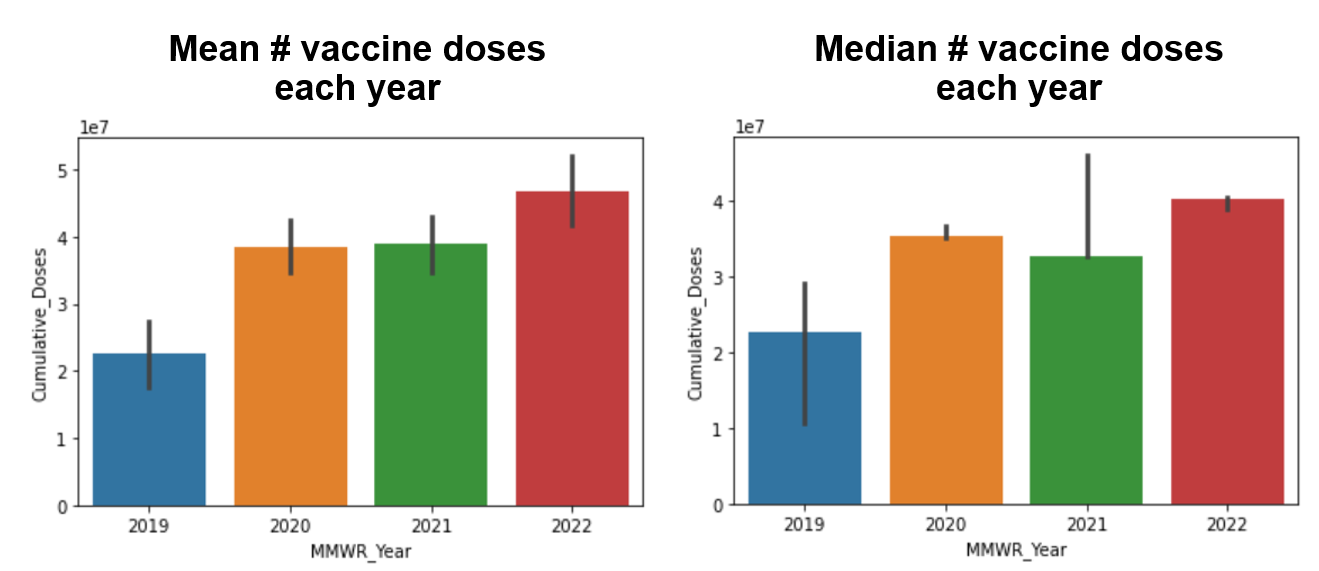

###Create a new bar graph where the error bars will now represent a 50% confidence interval.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

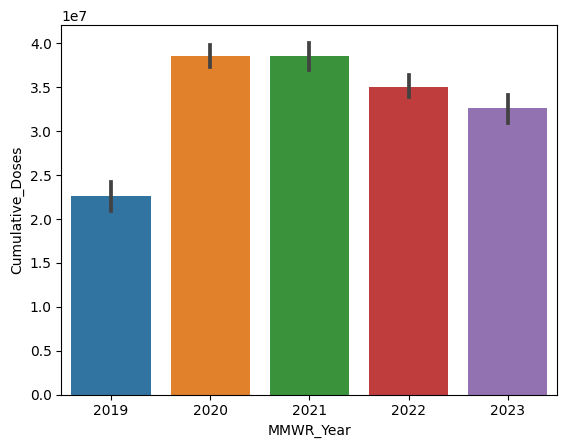

In [11]:
sns.barplot(data=df, x='MMWR_Year', y='Cumulative_Doses', errorbar=('ci',50))

###Create a new bar graph where the error bars now represent standard deviation (sd).
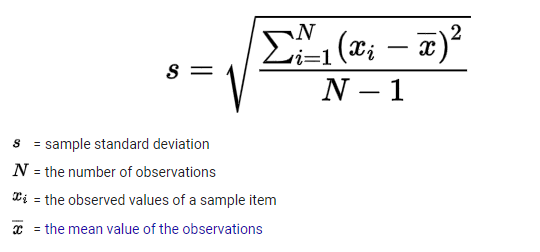

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

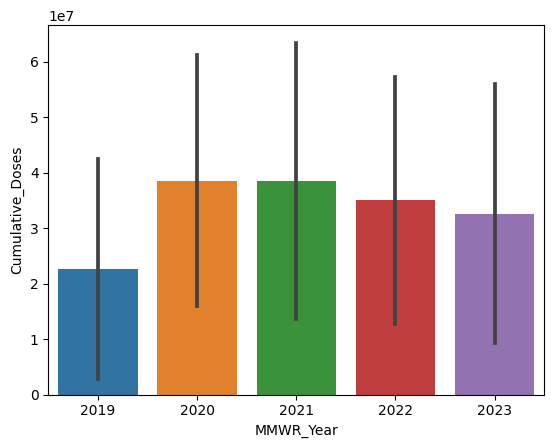

In [12]:
sns.barplot(data=df, x='MMWR_Year', y='Cumulative_Doses', errorbar='sd')

###Create a bar graph with error bar whiskers that are 20% the width of each category.




<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

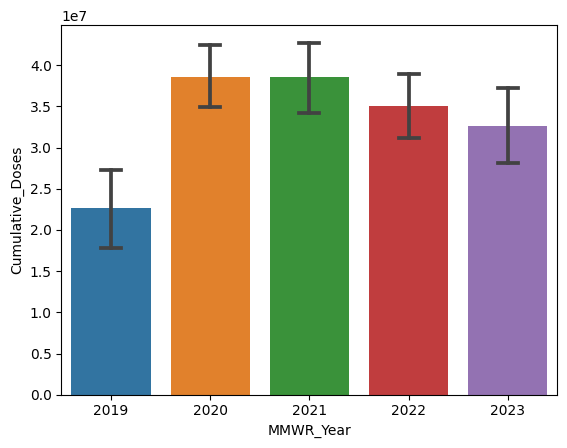

In [13]:
sns.barplot(data=df, x='MMWR_Year', y='Cumulative_Doses',capsize=0.2)

Create a bar graph with error bar whiskers that are 100% the width of each category.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

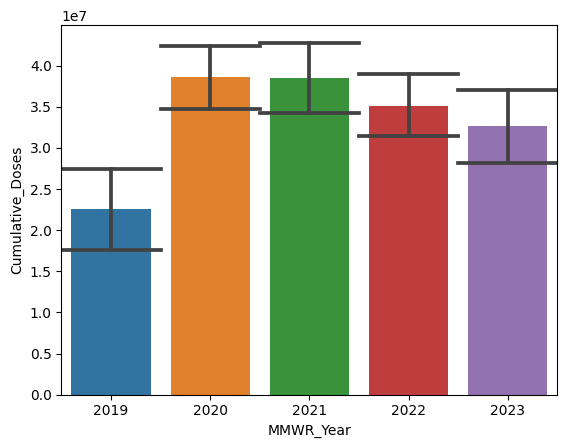

In [14]:
sns.barplot(data=df, x='MMWR_Year', y='Cumulative_Doses',capsize=1)

Notice how both the heights of the bars and their whiskers can change based on the exact summary statistics selected. This is why, it is always important to specify what summary statistics you use in your graphs to transparently convey the information they contain.

##**Box Plots**

Let's review how to read box plots.

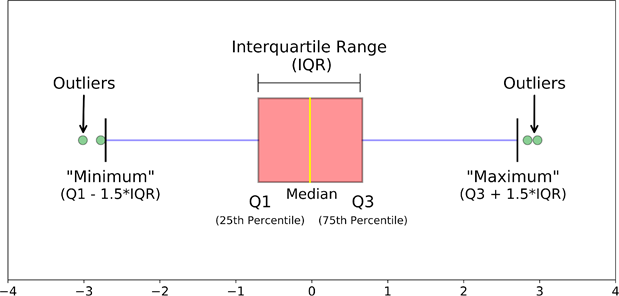

###Create a box plot showing the median number of influenza vaccine doses administered each year.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

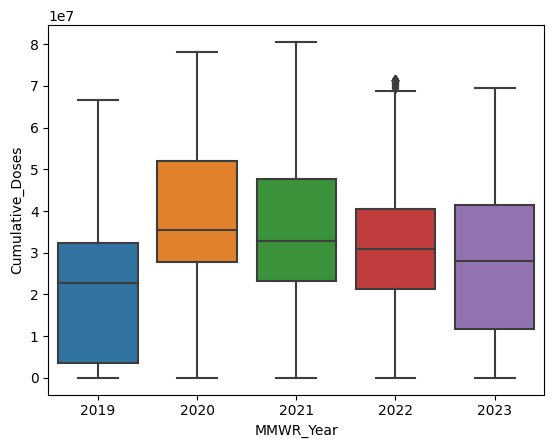

In [15]:
sns.boxplot(data=df, x='MMWR_Year', y='Cumulative_Doses')

Additionally, `fliersize=0` can be added to hide any outliers that are present.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

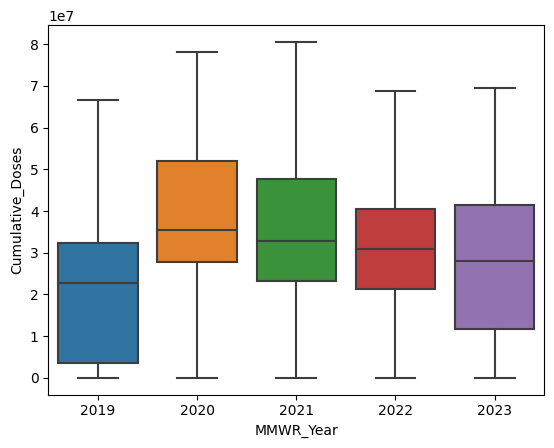

In [16]:
sns.boxplot(data=df, x='MMWR_Year', y='Cumulative_Doses',fliersize=0)

###Create a double-box plot like above but where mean tips are seperated by setting.
Notice that like before, a key is automatically generated.


<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

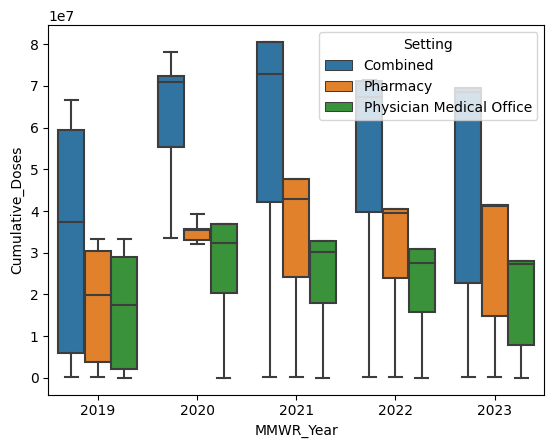

In [17]:
sns.boxplot(data=df, x='MMWR_Year', y='Cumulative_Doses',fliersize=0,hue='Setting')

##**Strip Plots**

Why use strip plots? Consider the situation below:

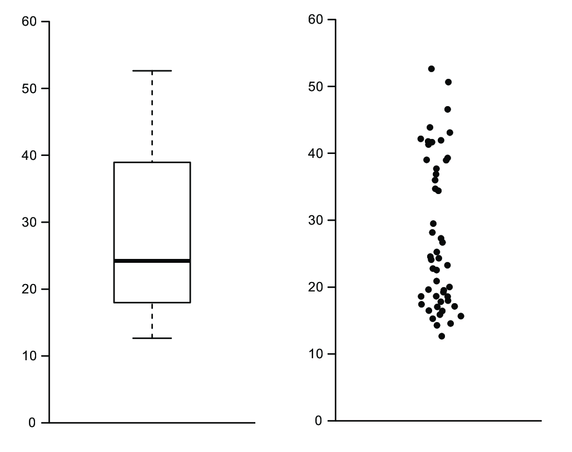

Notice how the box plot does not describe the data's distribution (bi-modal) nor its sample size.

###Create a strip plot showing all the weekly number of influenza vaccine doses.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

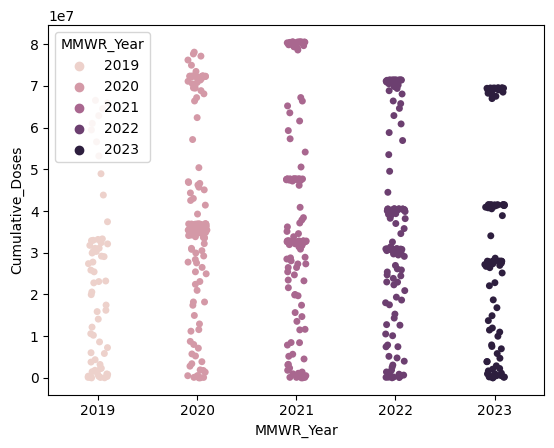

In [18]:
sns.stripplot(data=df, x='MMWR_Year', y='Cumulative_Doses', hue="MMWR_Year")

###Notice how the exact x-axis positions of datapoints are randomized each time the code is run.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

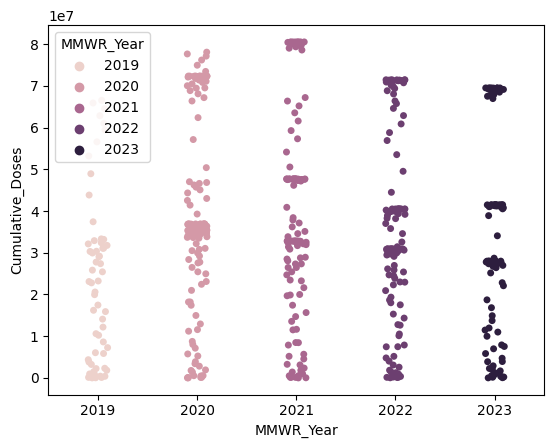

In [19]:
sns.stripplot(data=df, x='MMWR_Year', y='Cumulative_Doses', hue="MMWR_Year")

###Create a strip plot like above, but change the points from circles to triangles and adjust their size.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

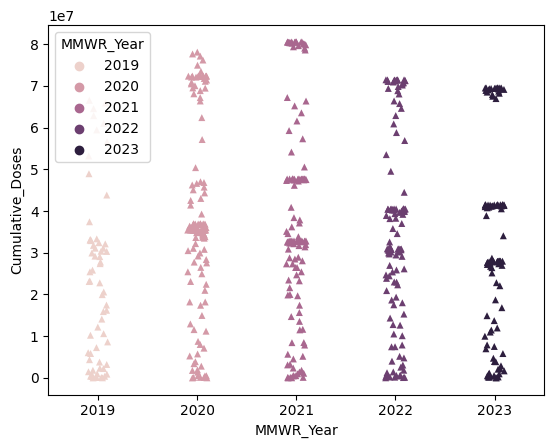

In [20]:
sns.stripplot(data=df, x='MMWR_Year', y='Cumulative_Doses', hue="MMWR_Year", marker='^', size=5)

###Create a strip plot like the first one, but with the points more spread out.

By default, jitter=1

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

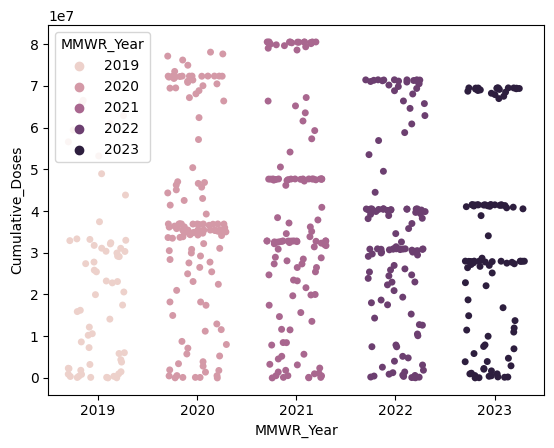

In [21]:
sns.stripplot(data=df, x='MMWR_Year', y='Cumulative_Doses', hue="MMWR_Year", jitter=.3)

###Create a strip plot like above, but reduce the alpha value (opacity) of each datapoint.
By default, alpha=1

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

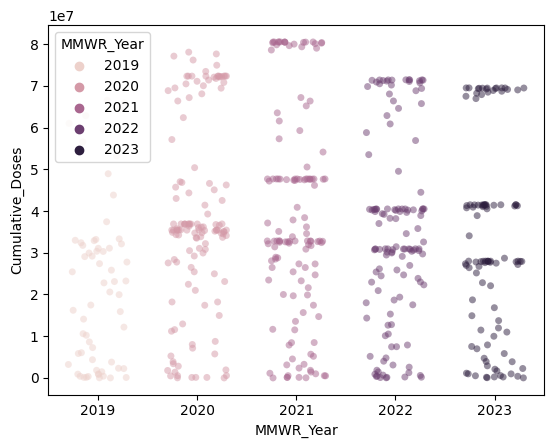

In [22]:
sns.stripplot(data=df, x='MMWR_Year', y='Cumulative_Doses', hue="MMWR_Year", jitter=.3, alpha=0.5)

###Create a double-strip plot where datapoints are labeled by color based on vaccine administration setting.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

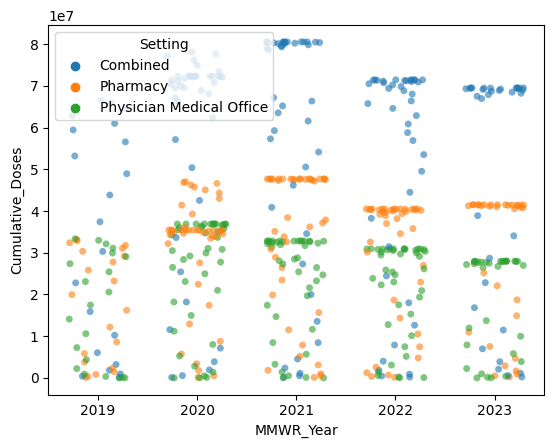

In [23]:
sns.stripplot(data=df, x='MMWR_Year', y='Cumulative_Doses',hue='Setting', jitter=.3,alpha=.6)

###Create a double-strip plot like above, but where alpha is reset and points of different color are seperated.
By default, dodge=False

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

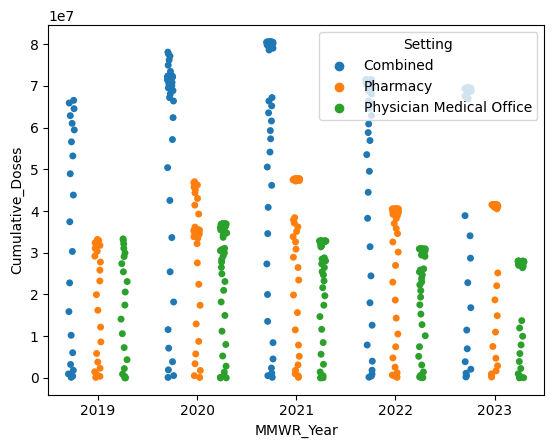

In [24]:
sns.stripplot(data=df, x='MMWR_Year', y='Cumulative_Doses',hue='Setting', dodge=True)

Sometimes in publications you will encounter an alternative to the Strip Plot called a Swarm Plot. You can create Swarm Plots in Seaborn as follows.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

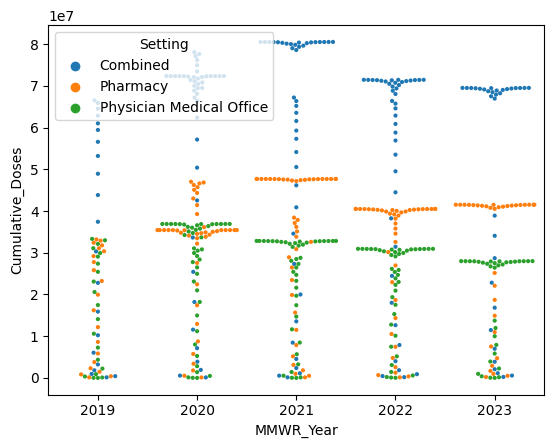

In [25]:
sns.swarmplot(data=df, x='MMWR_Year', y="Cumulative_Doses",hue='Setting', size=3)

Here, the `size` parameter specifies the side of individual dots.

#**Producing Publication-ready Figures**

##**Combining Plots**

Recall these two plots you have made. Consider the pros & cons of each.

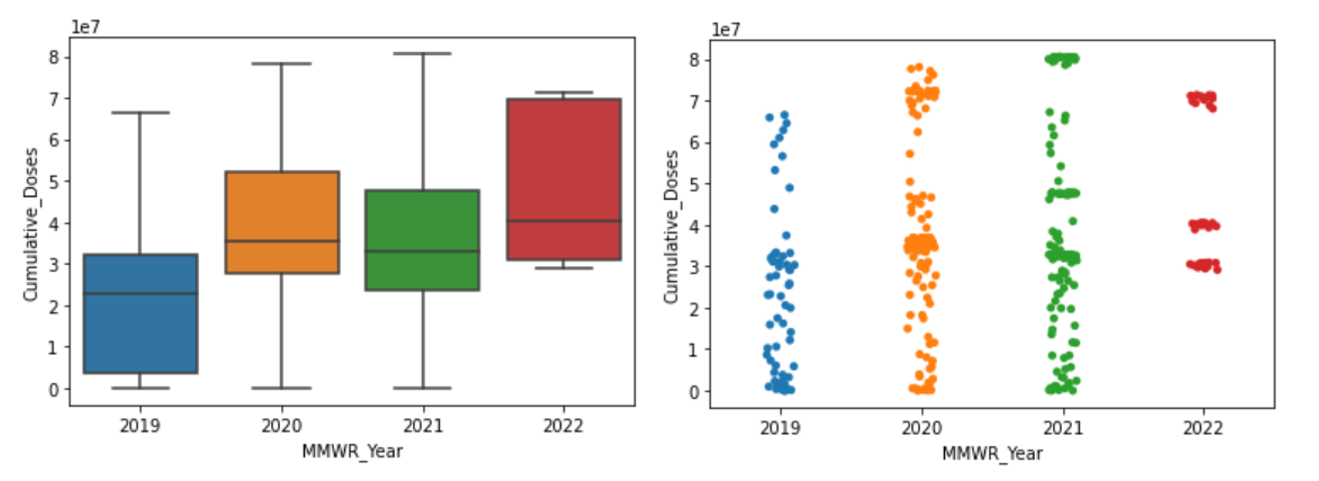

###Step 1. Produce a summary-statistics plot without color.
Notice that for bar plots, this is done with *facecolor=(1,1,1,0)* and for box plots,  *boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}*. `(1,1,1,0)` represents a transparent white in RGB color-space.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

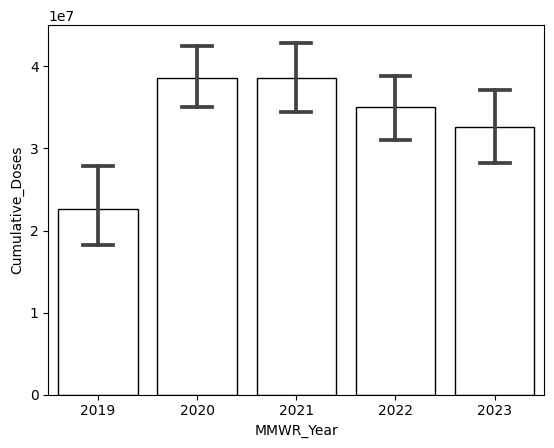

In [26]:
sns.barplot(data=df, x='MMWR_Year', y='Cumulative_Doses',edgecolor='black',facecolor='white', capsize=.3)

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

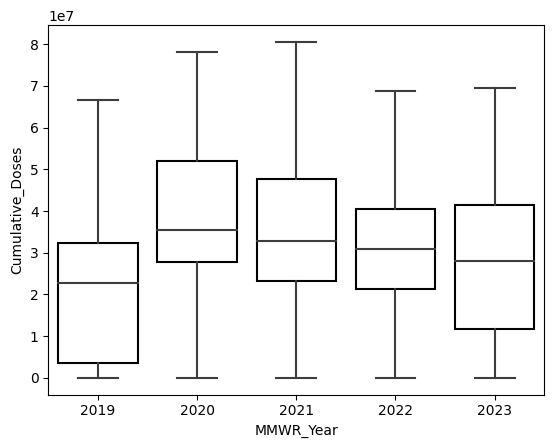

In [27]:
sns.boxplot(data=df, x='MMWR_Year', y='Cumulative_Doses',fliersize=0, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)})

###Step 2. Plot your datapoints with half opacity.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

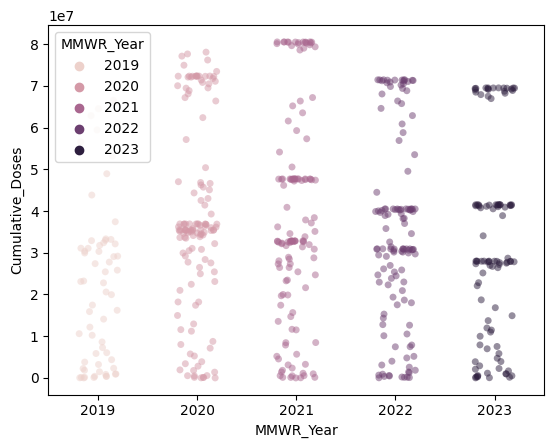

In [28]:
sns.stripplot(data=df, x='MMWR_Year', y='Cumulative_Doses',hue='MMWR_Year', alpha=.5, jitter=.2)

###Step 3. Run both lines of code in the same code block.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

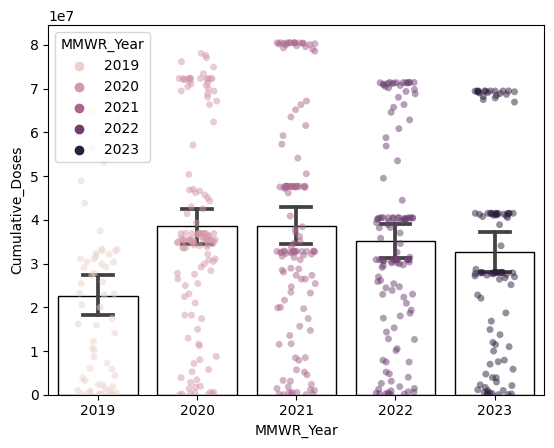

In [29]:
sns.barplot(data=df, x='MMWR_Year', y='Cumulative_Doses',edgecolor='black',facecolor=(1,1,1,0), capsize=.3)
sns.stripplot(data=df, x='MMWR_Year', y='Cumulative_Doses',hue='MMWR_Year', alpha=.5, jitter=.2)

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

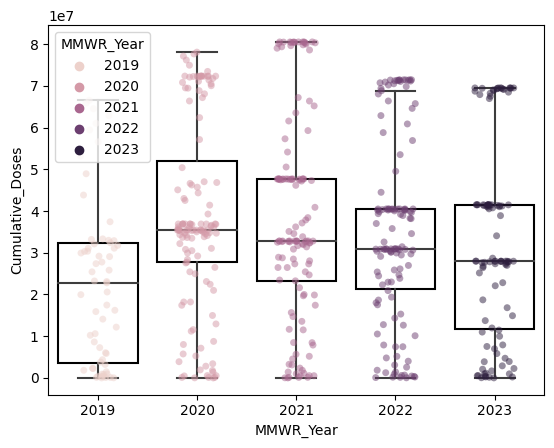

In [30]:
sns.boxplot(data=df, x='MMWR_Year', y='Cumulative_Doses',fliersize=0, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)})
sns.stripplot(data=df, x='MMWR_Year', y='Cumulative_Doses',hue='MMWR_Year', alpha=.5, jitter=.2)

Notice how some of the points obscure the lines of the box plot.

We can fix this by passing the *zorder=0* to *sns.stripplot*.
and *zorder=5* argument to *sns.boxplot*. This places the Strip Plots behind the Box Plots by adjusting the order of plots along the z-axis.

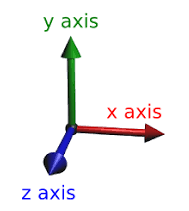

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

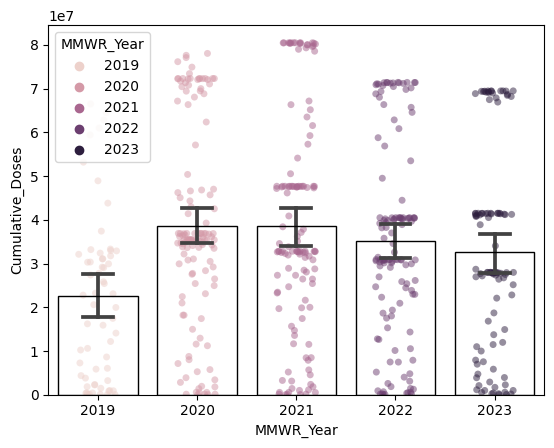

In [31]:
sns.barplot(data=df, x='MMWR_Year', y='Cumulative_Doses',edgecolor='black',facecolor=(1,1,1,0), capsize=.3, zorder=5)
sns.stripplot(data=df, x='MMWR_Year', y='Cumulative_Doses',hue='MMWR_Year', alpha=.5, jitter=.2, zorder=0)

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

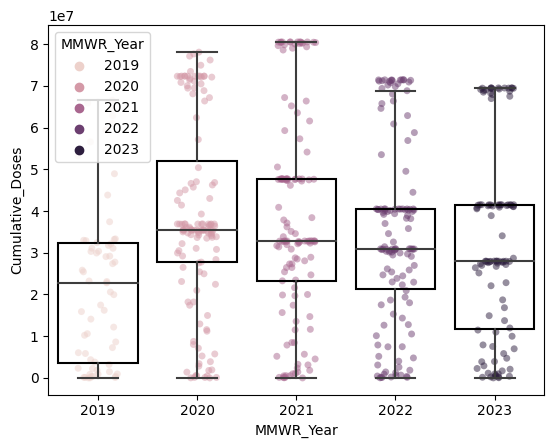

In [32]:
sns.boxplot(data=df, x='MMWR_Year', y='Cumulative_Doses',fliersize=0, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data=df, x='MMWR_Year', y='Cumulative_Doses',hue='MMWR_Year', alpha=.5, jitter=.2, zorder=0)

##**Violin Plots**


As an alternative to merging box plots with strip plots, you may also see Violin plots as they also display both summary statistics and a  "pseudo-distribution". They are useful in situations where you want to place more emphasis on the general shape of your data's distrbution.

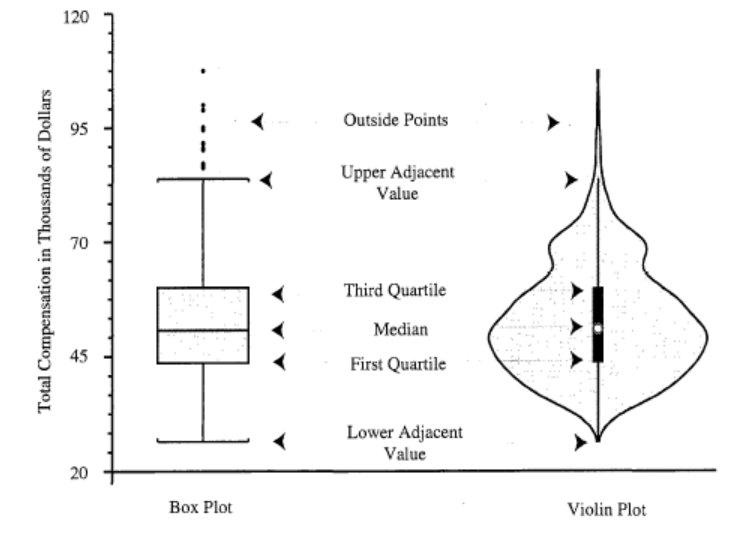

Plots of this type are made by calculating a Kernel density estimation of a distribution. Keep in mind that this is only an estimation of the distribution.

###Create a violin plot from the DataFrame showing the Kernel density estimation of the vaccine data.
Notice the bars inside each "violin" are similar to box plots.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

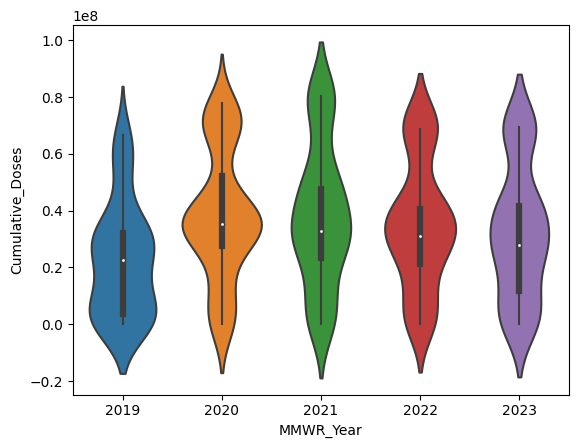

In [33]:
sns.violinplot(data=df, x='MMWR_Year', y='Cumulative_Doses')

In particular, notice how the Kernel density estimation of the 2022 data suggests a bimodal distribution rather than the actual tri-modal distribution. This is one of the tradeoffs of a Violin Plot.

###Create a violin plot like above, but make the broadness of each "violin" proportional to the number of counts.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

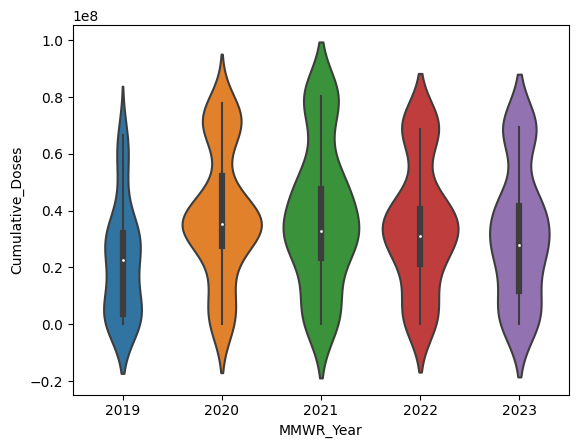

In [34]:
sns.violinplot(data=df, x='MMWR_Year', y='Cumulative_Doses', scale='count')

###Create a violin plot like above, but change how quartiles are represented.
Notice how the whiskers have been removed, leaving only the 1st, 2nd, and 3rd quartiles.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

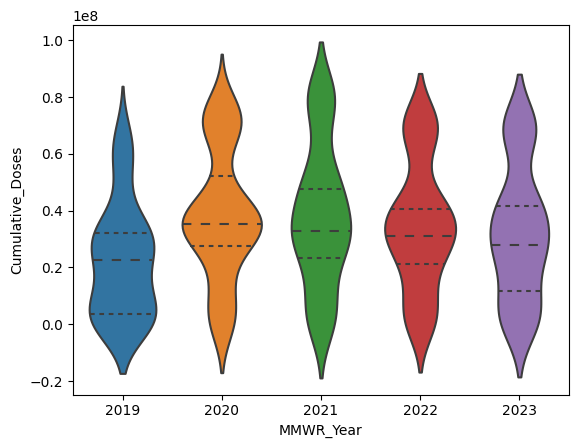

In [35]:
sns.violinplot(data=df, x='MMWR_Year', y='Cumulative_Doses',inner='quartile')

###Create a violin plot like above, but display points instead of summary statistics.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

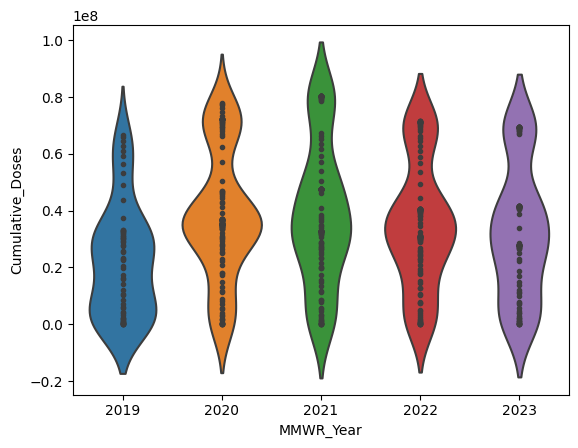

In [36]:
sns.violinplot(data=df, x='MMWR_Year', y='Cumulative_Doses', inner='point')

Notice how it is clearer that the 2022 data is tri-modal with this plot.

###Create a double-violin plot where the number of vaccine doses are seperated by setting.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

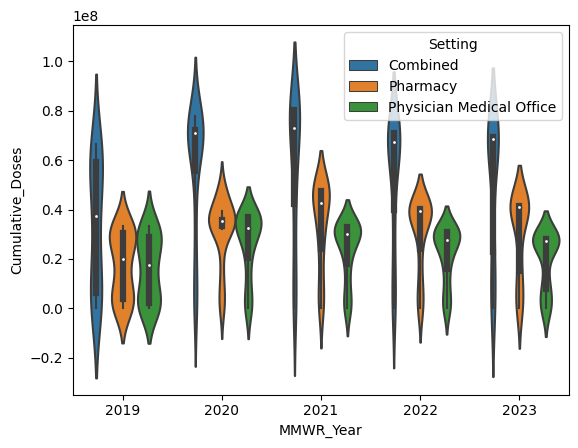

In [37]:
sns.violinplot(data=df, x='MMWR_Year', y='Cumulative_Doses', hue='Setting')

###Create a double-violin plot like above but where "violin-halves" are merged.

While this type of Violin plot saves space, it will only work when using `hue` values that contain two categories.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

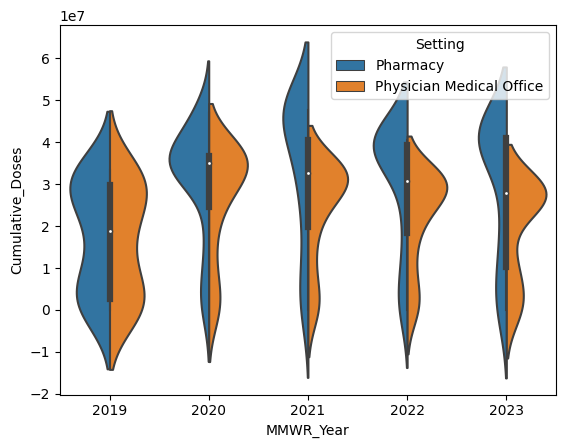

In [38]:
subset_df = df.loc[(df['Setting'] == 'Pharmacy') | (df['Setting'] == 'Physician Medical Office')]
sns.violinplot(data=subset_df, x='MMWR_Year', y='Cumulative_Doses', hue='Setting',split='True')

Additionally, notice how the whiskers have been lost.

#**Customizing Beyond Seaborn's Defaults**

##**Ordering Plot Elements**

###Create a bar plot showing the mean tip on each day in a custom order.
Notice how a single line of code could become very long with 10+ elements.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

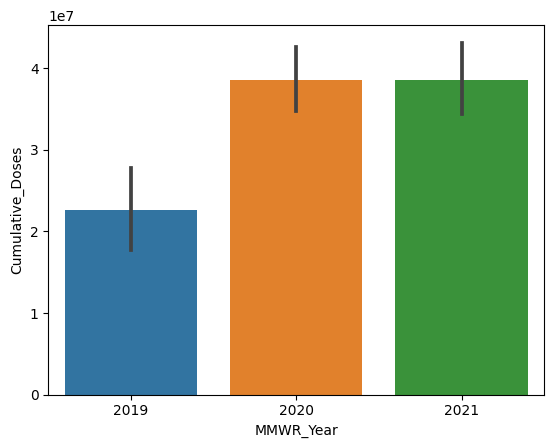

In [39]:
sns.barplot(data=df, x='MMWR_Year', y='Cumulative_Doses', order=[2019, 2020, 2021])

Create the same bar plot as above, but by passing the order list by name.


<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

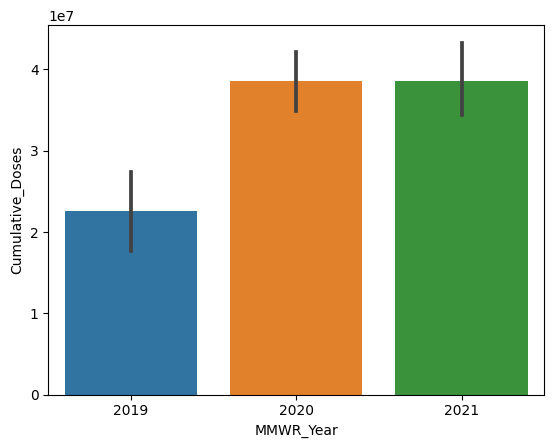

In [40]:
xOrder = [2019, 2020, 2021]
sns.barplot(data=df, x='MMWR_Year', y='Cumulative_Doses', order=xOrder)

###Create a double-bar plot like above, but where the sub-category of *day* follows a custom order.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

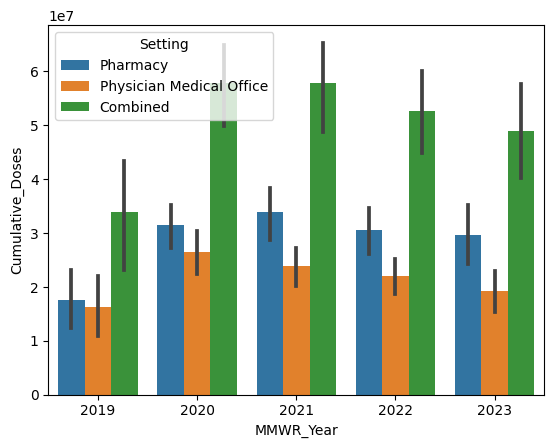

In [41]:
hueXOrder = ['Pharmacy','Physician Medical Office', 'Combined']
sns.barplot(data=df, x='MMWR_Year', y='Cumulative_Doses', hue_order=hueXOrder, hue='Setting')


##**Customizing Color Palettes**

You can enhance your plots' color consistency and accessibility with color palettes.

###Create a bar plot with one of Seaborn's preset color palettes.

Let's try using the `colorblind` palette which is optimized for readbility across different forms of colorblindness.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

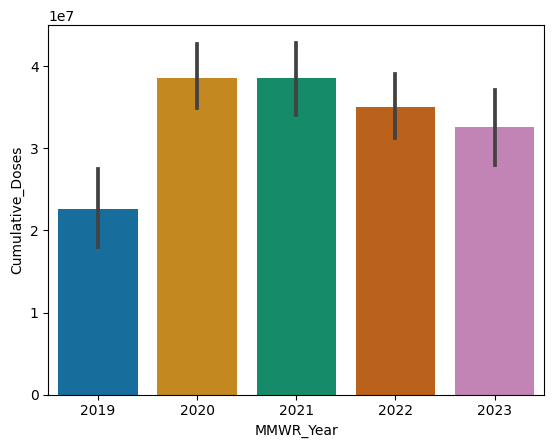

In [42]:
sns.barplot(data=df, x='MMWR_Year', y='Cumulative_Doses',palette='colorblind')

The full range of supported color palettes can be viewed here: [ List of Seaborn palettes ](https://seaborn.pydata.org/tutorial/color_palettes.html)

###Create a bar plot like above where a Python dictionary designates custom colors.

When displaying multiple graphs, it is important to use consistent colors schemes to avoid confusion. This can be adjusted manually as follows. Here we see a rare use-case where the keys in this dictionary are integers.

<Axes: xlabel='MMWR_Year', ylabel='Cumulative_Doses'>

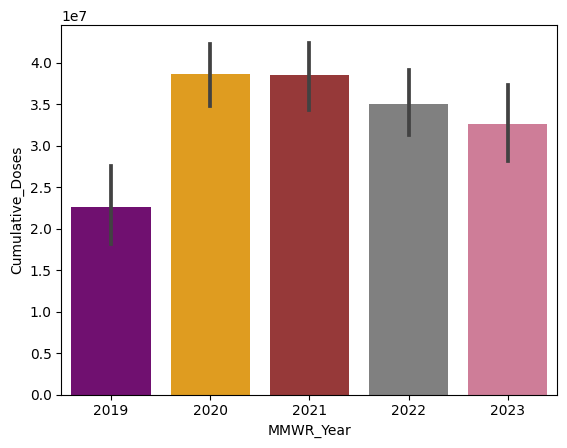

In [43]:
colorDict={2019:'purple', 2020:'orange', 2021:'brown', 2022:'gray', 2023:'palevioletred'}
sns.barplot(data=df, x='MMWR_Year', y='Cumulative_Doses',palette=colorDict)

The full range of supported colors can be viewed here: [ List of Matplotlib colors ](https://matplotlib.org/stable/gallery/color/named_colors.html)

##**Using Matplotlib Axes Datatype**

In order to further customize our plots, we will have to manipulate our figures at the level of Matplotlib instead of Seaborn. The simplest way to make many changes is by working with the Matplotlib-exclusive data type: Axes.

Similarly to how DataFrames are a code-based structure of tabular data, an Axes is Matplotlib's code-based representation of a figure and its elements. By convention, they are abbreviated as `ax` like how DataFrames are abbreviated as `df`.

### Save a figure (Axes) under the name `ax`.

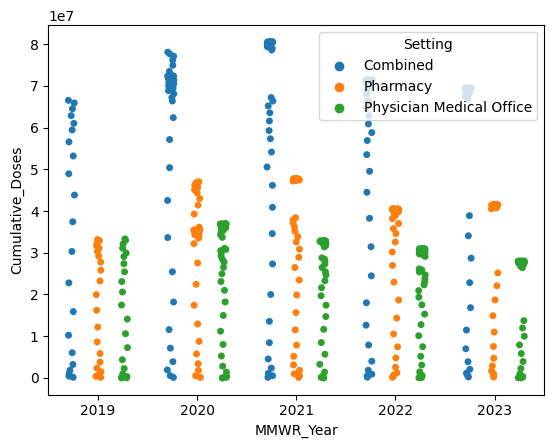

In [44]:
ax = sns.stripplot(data=df, x='MMWR_Year', y='Cumulative_Doses',hue='Setting', dodge=True)

While the notebook output is the same, saving the figure (Axes) under a name allows us to use the following functions.

###Move the legend outside of the plot.

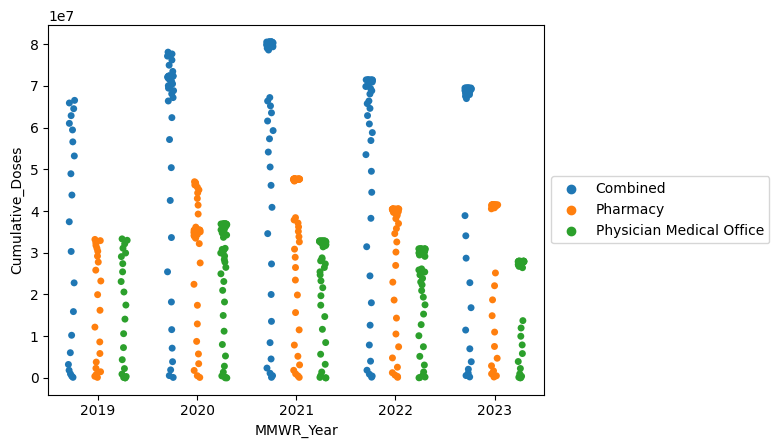

In [45]:
ax = sns.stripplot(data=df, x='MMWR_Year', y='Cumulative_Doses',hue='Setting', dodge=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

###Move the legend by adjusting the argument passed to `bbox_to_anchor`.

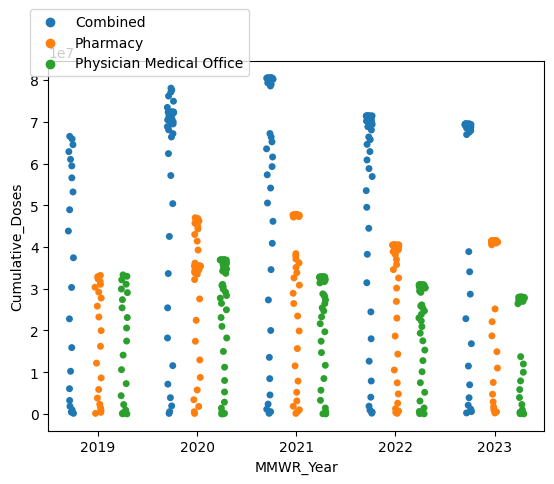

In [46]:
ax = sns.stripplot(data=df, x='MMWR_Year', y='Cumulative_Doses',hue='Setting', dodge=True)
ax.legend(loc='center left', bbox_to_anchor=(-0.05, 1.05))

###Change the number of columns in the legend with `ncol`.

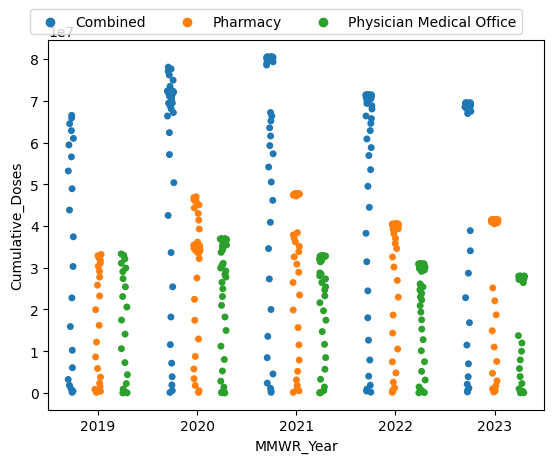

In [47]:
ax = sns.stripplot(data=df, x='MMWR_Year', y='Cumulative_Doses',hue='Setting', dodge=True)
ax.legend(loc='center left', bbox_to_anchor=(-0.05, 1.05), ncol = 3)

### Change the figure axes labels with `set()` to enhance clarity.

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Cumulative Doses')]

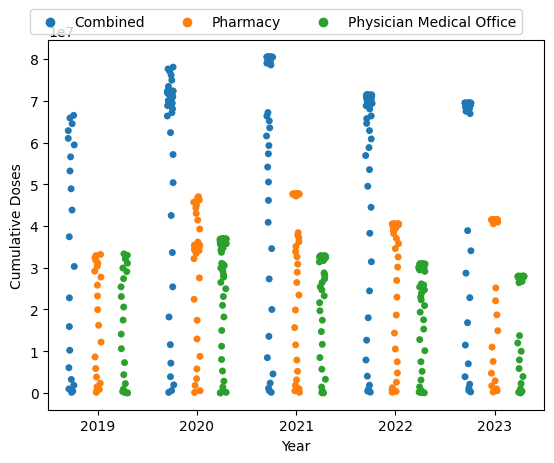

In [48]:
ax = sns.stripplot(data=df, x='MMWR_Year', y='Cumulative_Doses',hue='Setting', dodge=True)
ax.legend(loc='center left', bbox_to_anchor=(-0.05, 1.05), ncol = 3)
ax.set(xlabel='Year', ylabel='Cumulative Doses')

##**Selecting Plot Styles**

To give the finishing touches to your plots, Seaborn offers plot style and context themes which can be adjusted with `set_style()` and `set_context()` respectively.

Additionally, `despine()` can be used to remove a plot's top and right borders.

###Change the aesthetics of the combined plot.

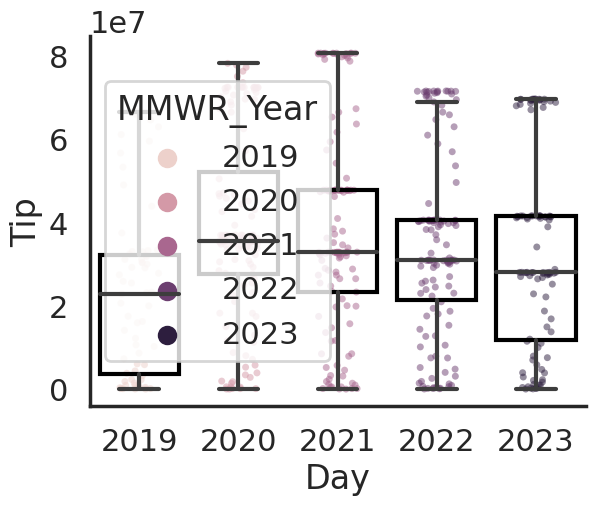

In [49]:
sns.set_style("white")
sns.set_context("poster")
axes = sns.boxplot(data=df, x='MMWR_Year', y='Cumulative_Doses',fliersize=0, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
axes = sns.stripplot(data=df, x='MMWR_Year', y='Cumulative_Doses', hue='MMWR_Year', alpha=.5, jitter=.2, zorder=0)
axes.set(xlabel='Day', ylabel='Tip')
sns.despine()

###Change the aesthetics of the violin plot.

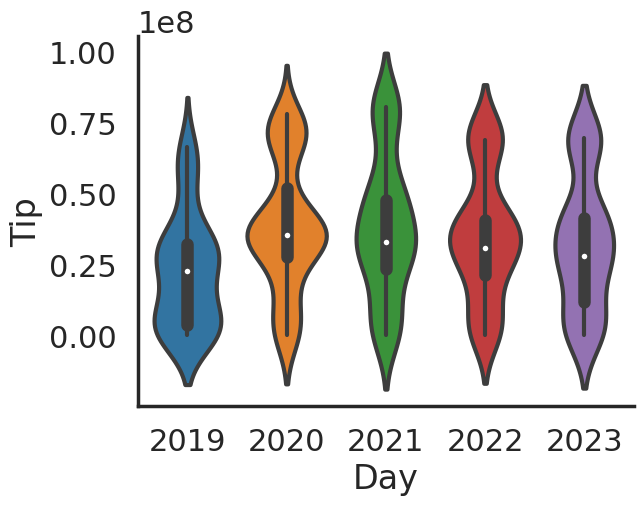

In [50]:
sns.set_style("white")
sns.set_context("poster")
axesTwo = sns.violinplot(data=df, x='MMWR_Year', y='Cumulative_Doses')
axesTwo.set(xlabel='Day', ylabel='Tip')
sns.despine()

Notice how both these figures are now easier to read from afar. This is in large part due to *sns.set_context("poster")* .

Other contexts include 'notebook' (default), 'paper', and 'talk'.

###To return to default settings:

In [51]:
sns.reset_orig()

#**Saving Figures**

In order to export your Seaborn figures, we will have to use Matplotlib functions that are not natively used in Seaborn.

###Import the Matplotlib library to gain access to `savefig()` and `figure()`.

In [52]:
import matplotlib.pyplot as plt

###Save your figure with `savefig()`.
You can save your figure in different formats based on the given file extension. Supported formats are .png, .jpeg, .pdf, and .svg .

Additionally, setting bbox_inches=‘tight’ ensures that your figures are not truncated.

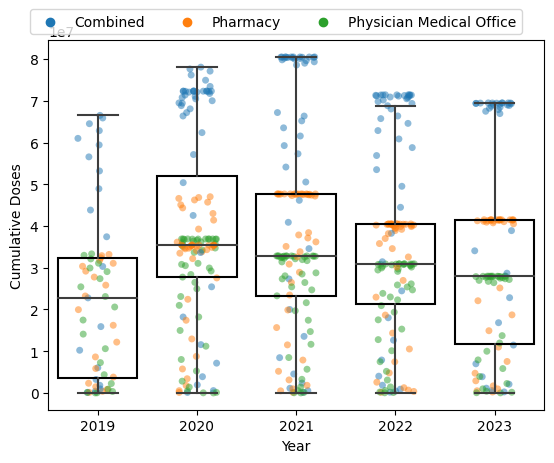

In [53]:
sns.boxplot(data=df, x='MMWR_Year', y='Cumulative_Doses',fliersize=0, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
ax=sns.stripplot(data=df, x='MMWR_Year', y='Cumulative_Doses',hue='Setting', alpha=.5, jitter=.2, zorder=0)
ax.set(xlabel='Year', ylabel='Cumulative Doses')
ax.legend(loc='center left', bbox_to_anchor=(-0.05, 1.05), ncol = 3)

plt.savefig("/content/plotName.pdf", bbox_inches='tight')

It is recommended that you save your figures in vector formats (`.pdf` or `.svg`) instead of pixel formats (`.png` or `.jpeg`) to prevent blurriness when resizing images like below.

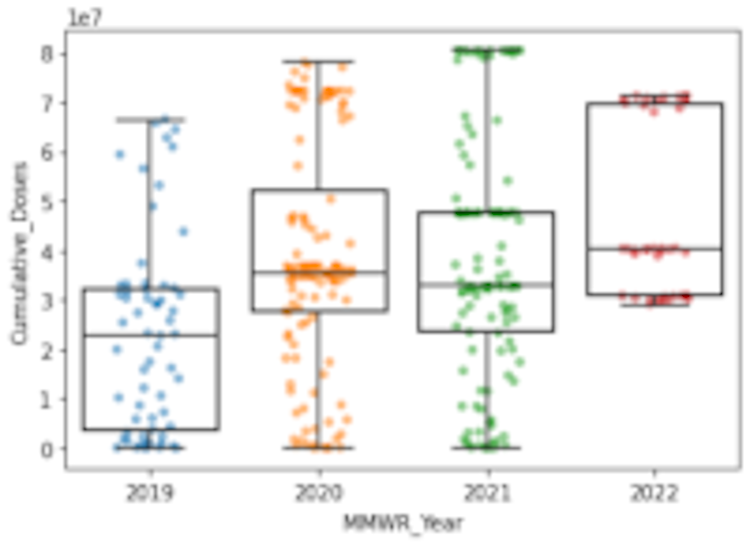

### Export the saved figure with different dimensions using `figure()`.

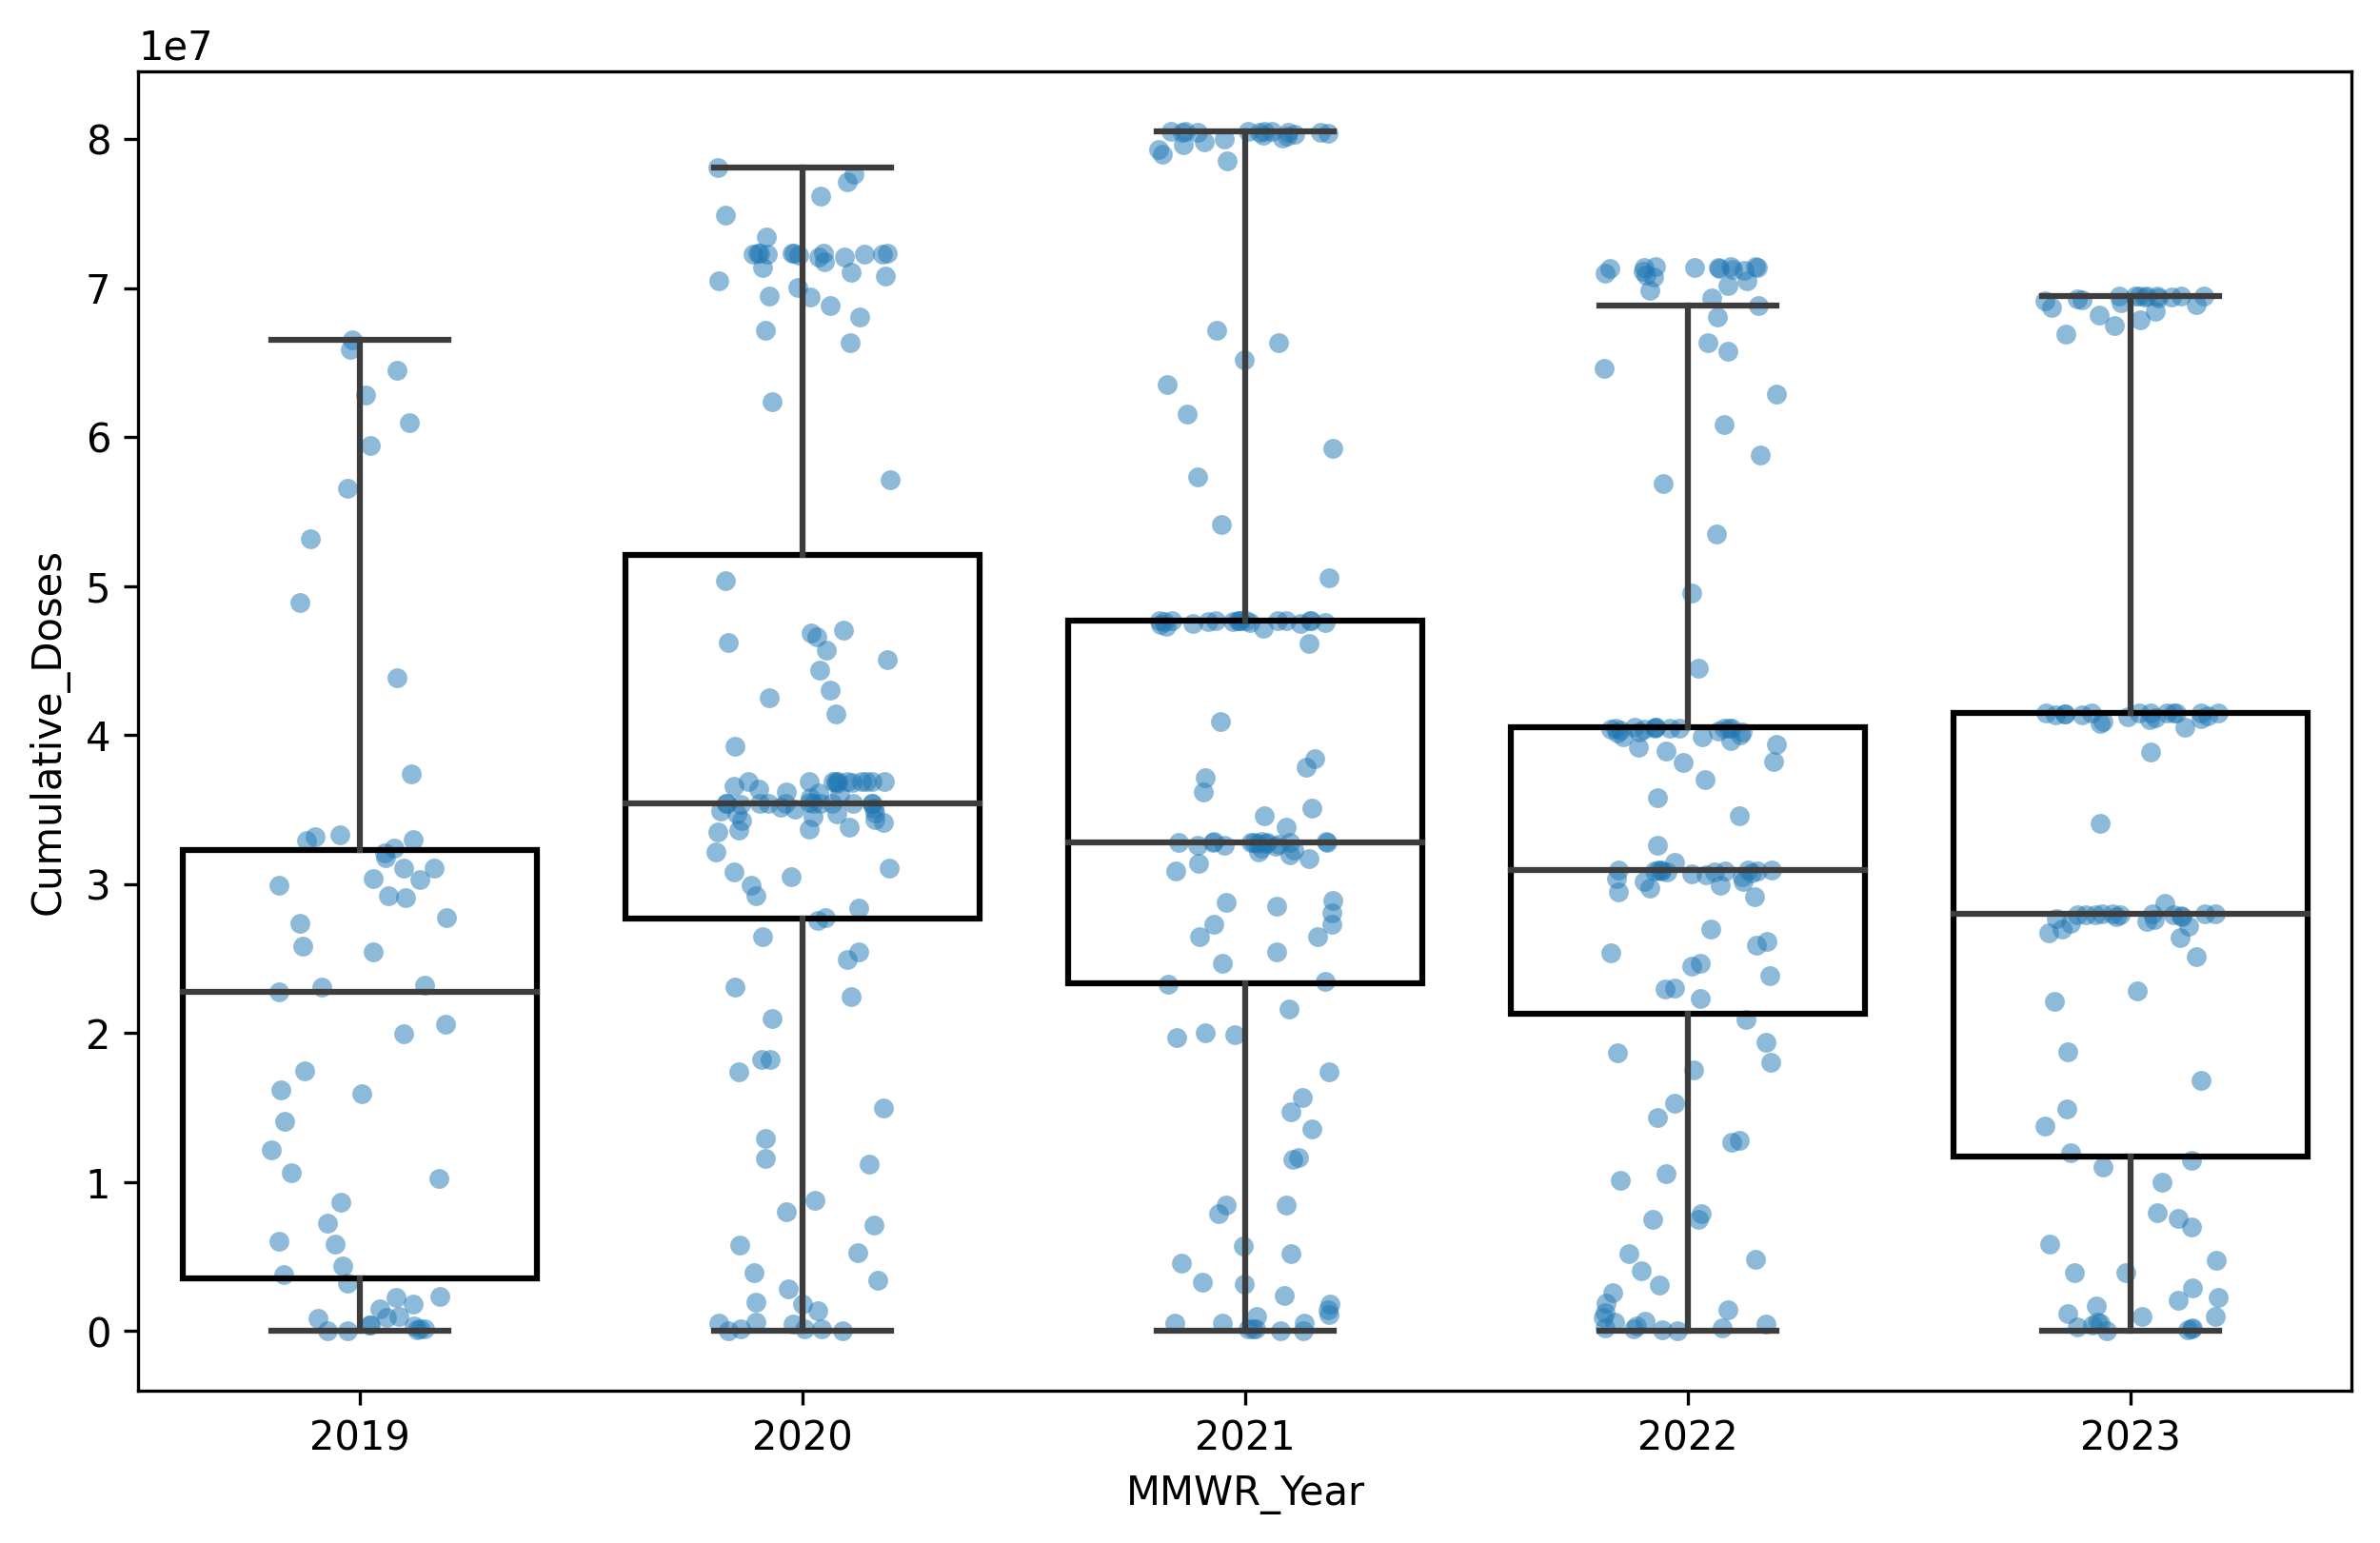

In [54]:
plt.figure(figsize = (10, 6), dpi = 300)

sns.boxplot(data=df, x='MMWR_Year', y='Cumulative_Doses',fliersize=0, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data=df, x='MMWR_Year', y='Cumulative_Doses', alpha=.5, jitter=.2, zorder=0)

plt.savefig("/content/plotNameLarge.pdf", bbox_inches='tight')

#**Additional plot types**

The Seaborn library support many other plot types. While we are unable to cover them all, here are some examples for non-categorical data.



###**Seaborn Histogram**

<Axes: xlabel='Cumulative_Doses', ylabel='Count'>

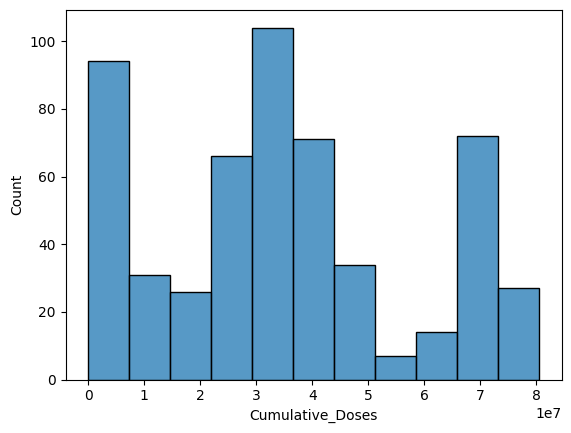

In [55]:
sns.histplot(data=df, x='Cumulative_Doses')

<Axes: xlabel='Cumulative_Doses', ylabel='Count'>

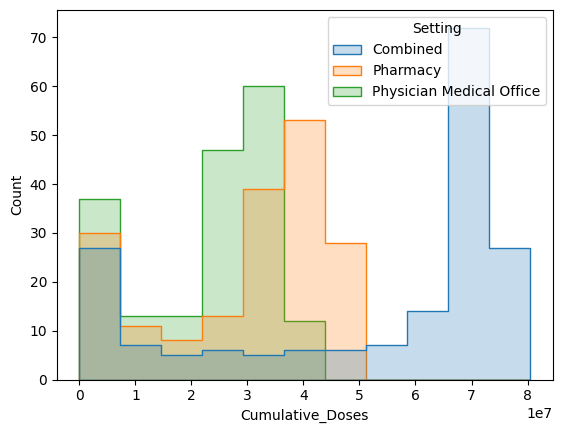

In [56]:
sns.histplot(data=df, x='Cumulative_Doses', hue="Setting", element="step")

###**Seaborn Line Plots**

<Axes: xlabel='MMWR_Week', ylabel='Cumulative_Doses'>

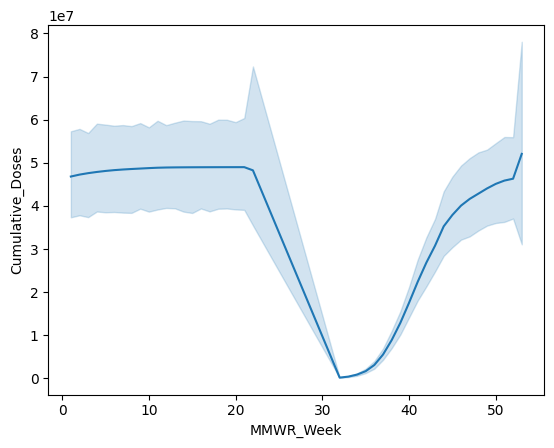

In [57]:
sns.lineplot(data=df, x='MMWR_Week', y='Cumulative_Doses')

<Axes: xlabel='MMWR_Week', ylabel='Cumulative_Doses'>

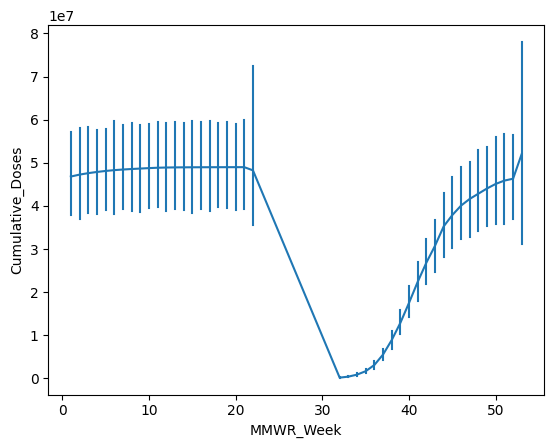

In [58]:
sns.lineplot(data=df, x='MMWR_Week', y='Cumulative_Doses',err_style='bars')

### **Seaborn Scatter Plot**

<Axes: xlabel='Doses', ylabel='Cumulative_Doses'>

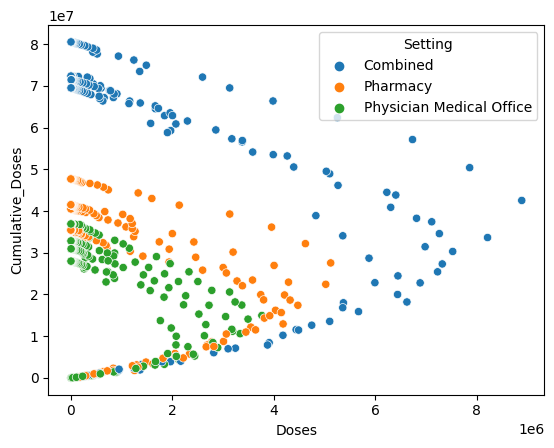

In [59]:
sns.scatterplot(data=df, x='Doses', y='Cumulative_Doses', hue='Setting')

### **Seaborn Heatmaps**

####Step 1: Collapse duplicate entries with `groupby()`.

In [60]:
dfGrouped=df.groupby(['MMWR_Week', 'MMWR_Year']).mean()
dfGrouped = dfGrouped.reset_index()
dfGrouped

<ipython-input-60-24580d7ba445>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfGrouped=df.groupby(['MMWR_Week', 'MMWR_Year']).mean()


MMWR_Week  MMWR_Year  MMWR_Week_Order  MMWR_Day          Doses  \
0            1       2020             28.0  6.333333  437456.000000   
1            1       2021             28.0  6.333333  338578.666667   
2            1       2022             28.0  6.333333  568428.000000   
3            1       2023             28.0  6.333333  380098.666667   
4            2       2020             29.0  6.333333  605640.000000   
..         ...        ...              ...       ...            ...   
177         52       2019             26.0  6.333333  419886.000000   
178         52       2020             26.0  6.333333  346455.333333   
179         52       2021             26.0  6.333333  559470.000000   
180         52       2022             26.0  6.333333  420133.333333   
181         53       2020             27.0  6.333333  289417.333333   

     Cumulative_Doses  Location_and_Flu_Season_Order  
0        4.477431e+07                           24.0  
1        5.237814e+07                           25.0  
2        4.535535e+07                           26.0  
3        4.461996e+07                           27.0  
4        4.537995e+07                           24.0  
..                ...                            ...  
177      4.433686e+07                           24.0  
178      5.175015e+07                           25.0  
179      4.478692e+07                           26.0  
180      4.423986e+07                           27.0  
181      5.203956e+07                           25.0  

[182 rows x 7 columns]

#### Step 2: Convert from a standard DataFrame to matrix data format.

In [61]:
matrixDF = dfGrouped.pivot('MMWR_Year', 'MMWR_Week', 'Doses')
matrixDF.head()

<ipython-input-61-9df84848b129>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrixDF = dfGrouped.pivot('MMWR_Year', 'MMWR_Week', 'Doses')


MMWR_Week             1              2              3              4   \
MMWR_Year                                                               
2019                 NaN            NaN            NaN            NaN   
2020       437456.000000  605640.000000  509386.000000  397073.333333   
2021       338578.666667  289633.333333  221555.333333  183170.000000   
2022       568428.000000  521216.000000  361956.666667  306443.333333   
2023       380098.666667  371735.333333  263391.333333  217695.333333   

MMWR_Week             5              6              7              8   \
MMWR_Year                                                               
2019                 NaN            NaN            NaN            NaN   
2020       387194.666667  296020.666667  231068.000000  182952.000000   
2021       136306.000000  111338.000000   73515.333333   78254.000000   
2022       237145.333333  203933.333333  156709.333333  121276.000000   
2023       175211.333333  148981.333333  115223.333333   91000.666667   

MMWR_Week             9              10  ...            44            45  \
MMWR_Year                                ...                               
2019                 NaN            NaN  ...  3.400915e+06  2.842869e+06   
2020       198930.000000  249790.666667  ...  3.501906e+06  2.656138e+06   
2021        55324.000000   41138.000000  ...  2.928452e+06  2.389358e+06   
2022        85930.666667   65233.333333  ...  3.356072e+06  2.659068e+06   
2023        76943.333333   61944.000000  ...           NaN           NaN   

MMWR_Week            46            47            48            49  \
MMWR_Year                                                           
2019       2.251247e+06  1.904925e+06  1.048945e+06  1.231465e+06   
2020       2.087222e+06  1.730264e+06  9.048640e+05  9.914467e+05   
2021       2.115283e+06  1.311977e+06  1.531676e+06  1.304435e+06   
2022       2.253356e+06  1.269088e+06  1.380343e+06  1.335583e+06   
2023                NaN           NaN           NaN           NaN   

MMWR_Week            50             51             52             53  
MMWR_Year                                                             
2019       1.111063e+06  912180.000000  419886.000000            NaN  
2020       8.280953e+05  625340.000000  346455.333333  289417.333333  
2021       1.109325e+06  773148.666667  559470.000000            NaN  
2022       1.150342e+06  764198.000000  420133.333333            NaN  
2023                NaN            NaN            NaN            NaN  

[5 rows x 44 columns]

### Seaborn Heatmap Step 3: Exploratory plotting

<Axes: xlabel='MMWR_Week', ylabel='MMWR_Year'>

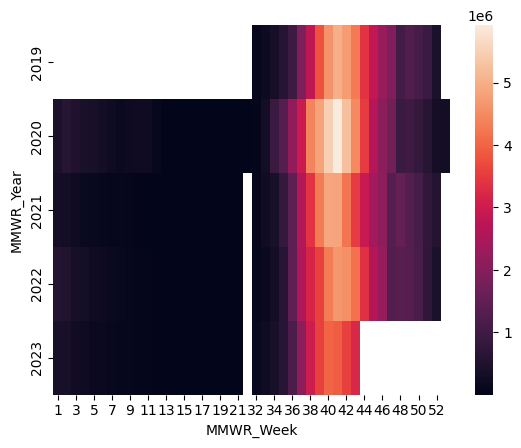

In [62]:
sns.heatmap(data=matrixDF)

Notice that while we can see a yearly trend in influenza vaccine administration, there are several white gaps in this plot that make it difficult to understand at a glance.

### Seaborn Heatmap Step 4: Plot refinement

To clean make our graph more presentable, let's show only completely recorded years (2022,2021,2022) and remove weeks containing incomplete data (weeks 22-31 and 53).

In [63]:
xAxis = [2022,2021,2022]
yAxis = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
         16, 17, 18, 19, 20, 21, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
         49, 50, 51, 52]

matrixDF = matrixDF.reindex(index=xAxis, columns = yAxis)
matrixDF

MMWR_Week             1              2              3              4   \
MMWR_Year                                                               
2022       568428.000000  521216.000000  361956.666667  306443.333333   
2021       338578.666667  289633.333333  221555.333333  183170.000000   
2022       568428.000000  521216.000000  361956.666667  306443.333333   

MMWR_Week             5              6              7         8   \
MMWR_Year                                                          
2022       237145.333333  203933.333333  156709.333333  121276.0   
2021       136306.000000  111338.000000   73515.333333   78254.0   
2022       237145.333333  203933.333333  156709.333333  121276.0   

MMWR_Week            9             10  ...            43         44  \
MMWR_Year                              ...                            
2022       85930.666667  65233.333333  ...  4.151777e+06  3356072.0   
2021       55324.000000  41138.000000  ...  3.510230e+06  2928452.0   
2022       85930.666667  65233.333333  ...  4.151777e+06  3356072.0   

MMWR_Week         45            46            47            48            49  \
MMWR_Year                                                                      
2022       2659068.0  2.253356e+06  1.269088e+06  1.380343e+06  1.335583e+06   
2021       2389358.0  2.115283e+06  1.311977e+06  1.531676e+06  1.304435e+06   
2022       2659068.0  2.253356e+06  1.269088e+06  1.380343e+06  1.335583e+06   

MMWR_Week            50             51             52  
MMWR_Year                                              
2022       1.150342e+06  764198.000000  420133.333333  
2021       1.109325e+06  773148.666667  559470.000000  
2022       1.150342e+06  764198.000000  420133.333333  

[3 rows x 42 columns]

<Axes: xlabel='MMWR_Week', ylabel='MMWR_Year'>

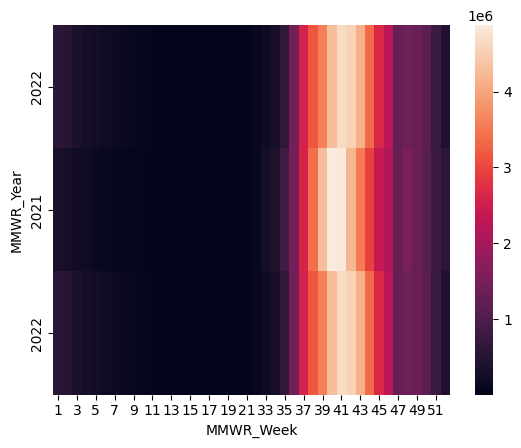

In [64]:
sns.heatmap(data=matrixDF)

[Text(0.5, 23.52222222222222, 'Week'), Text(50.722222222222214, 0.5, 'Year')]

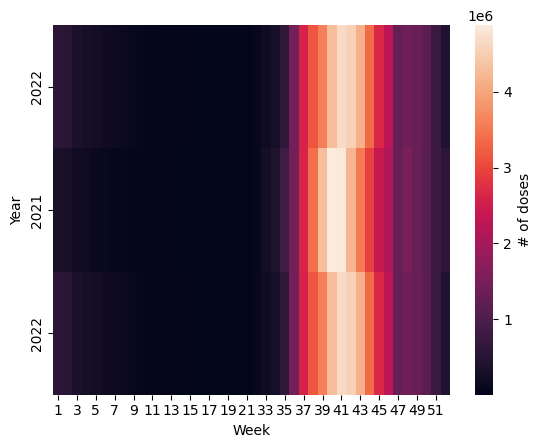

In [65]:
ax = sns.heatmap(data=matrixDF, cbar_kws={'label': '# of doses'})
ax.set(xlabel='Week', ylabel='Year')

[Text(0.5, 23.52222222222222, 'Week'), Text(50.722222222222214, 0.5, 'Year')]

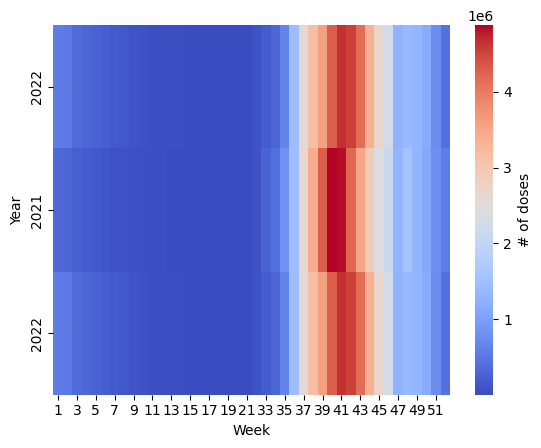

In [66]:
ax = sns.heatmap(data=matrixDF, cbar_kws={'label': '# of doses'}, cmap='coolwarm')
ax.set(xlabel='Week', ylabel='Year')

For a comprehensive list of Seaborn's plots, refer to the Seaborn website's tutorials circled in red.

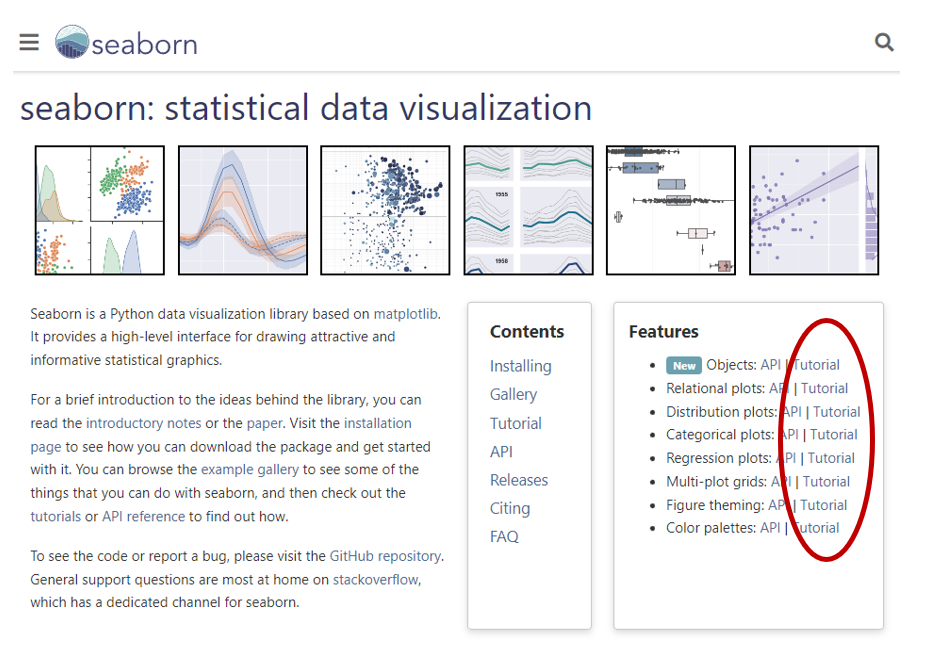

# **Hands-on Assignment 5: Producing Publication-ready Figures with Seaborn**

##**Introduction**
Data visualization is a key aspect of exploratory data analysis and data reporting. It facilitates rapid comprehension of whatever aspects of your data you seek to highlight.

Here you will gain experience performing data visualization with real-world medical dataset to highlight specific aspects of the data.

The data you will be using a dataset published by The National Heart, Lung and Blood Institute (NHLBI) from a clinical trial known as the Digitalis Investigation Group (DIG) Trial. This data contains baseline and outcome information for chronic heart failure patients from the DIG Trial cohort who received either the drug Digoxin or a placebo. Here, outcomes have been recorded under two main categories, cardiovasular mortality and hospitalization.


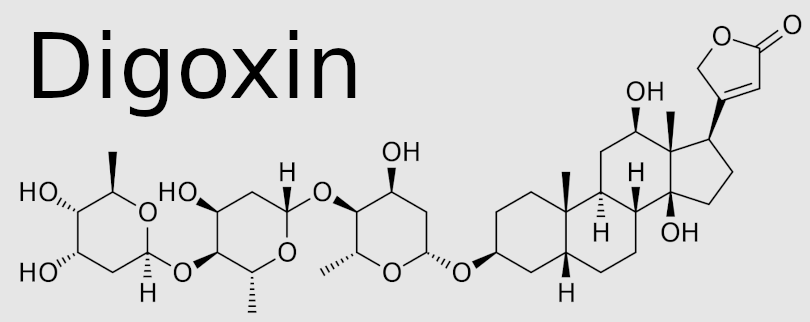

For more information, you may refer to a comprehensive description of this dataset here:

https://biolincc.nhlbi.nih.gov/media/teachingstudies/digdoc.pdf?link_time=2022-09-20_07:24:09.208947

##**Instructions**

In your own Colab notebook, use the commands presented in the previous sections to plot the following graphs using Seaborn. You will be graded based on whether your Colab notebook can produce exact or near-exact plots and export them.

##**Steps**

To start, import this `.csv` file generated from the Pandas DataFrame in the previous assignment. Here is the direct link to this dataset:

https://drive.google.com/uc?export=download&id=1L4aScG_IYBOnCCgtjJ1yLKUhi6n68YGP

In [67]:
import pandas as pd
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1L4aScG_IYBOnCCgtjJ1yLKUhi6n68YGP')

You may view the file again in the code-block below.

In [68]:
df.head()

AGE  RACE  SEX  EJF_PER  CREAT  KLEVEL  CHFDUR CHFETIOL PREVMI  DIABETES  \
0   77     1    1       12  1.500     3.1     2.0      4.0    1.0         0   
1   72     1    2       36  1.239     5.1    12.0      1.0    0.0         0   
2   74     1    1       15  1.466     4.0   288.0      4.0    0.0         0   
3   69     2    2       45  1.200     4.3    84.0      4.0    1.0         0   
4   64     1    2       30  1.300     4.3    31.0      1.0    1.0         0   

  HYPERTEN DIGDOSE  CVD  WHF  DIG  HOSP  NHOSP  DEATH     REASON  \
0      1.0    0.25    1    1    0     1      4      1        1.0   
1      1.0    0.25    1    1    0     1      2      0  Not given   
2      0.0   0.375    1    1    0     1      5      0  Not given   
3      0.0    0.25    1    0    0     1      5      0  Not given   
4      0.0    0.25    0    0    0     0      0      1        2.0   

   DIABETES_AND_HYPERTEN  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

Use the Seaborn library to replicate the following graphs and export them.

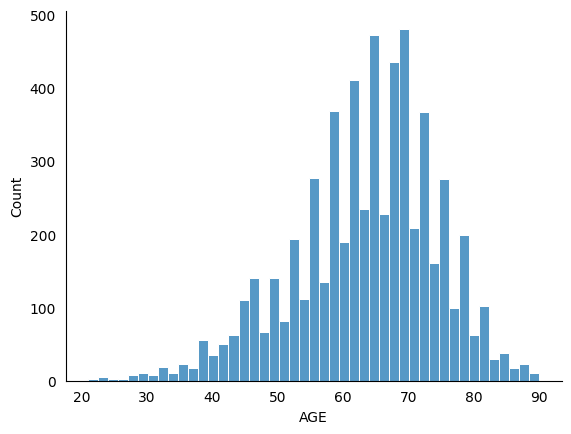

In [69]:
import seaborn as sns
sns.histplot(data=df, x='AGE',edgecolor='white')
sns.despine()
import matplotlib.pyplot as plt
plt.tick_params(left= False, bottom= False)
plt.savefig("1.pdf", bbox_inches='tight')

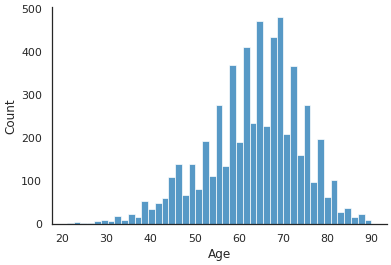

<ipython-input-70-1a7442eaad3b>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x='DIGDOSE', y='NHOSP', order=['0.0', '0.125', '0.25', '0.375', '0.5'], palette='colorblind', alpha=0.5, legend=False)


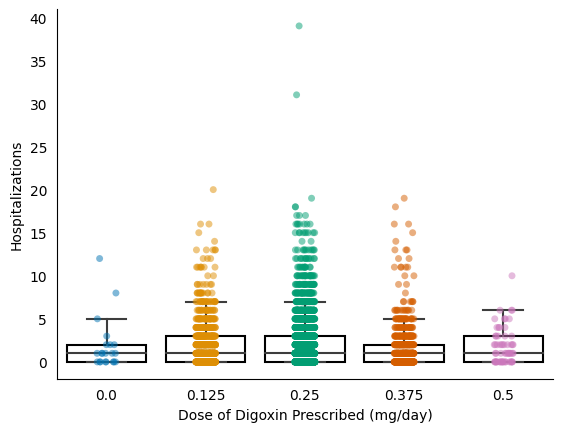

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df, x='DIGDOSE', y='NHOSP', fliersize=0, boxprops={'edgecolor': 'black', 'facecolor': (1, 1, 1, 0)}, order=['0.0', '0.125', '0.25', '0.375', '0.5'])
sns.stripplot(data=df, x='DIGDOSE', y='NHOSP', order=['0.0', '0.125', '0.25', '0.375', '0.5'], palette='colorblind', alpha=0.5, legend=False)
sns.despine()
plt.tick_params(left= False, bottom= False)
plt.xlabel('Dose of Digoxin Prescribed (mg/day)')
plt.ylabel('Hospitalizations')
plt.savefig('2.pdf', format='pdf', bbox_inches='tight')

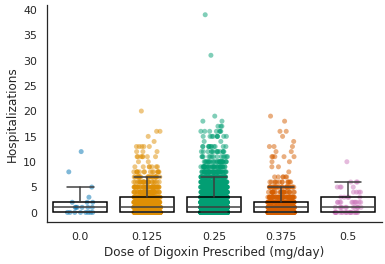

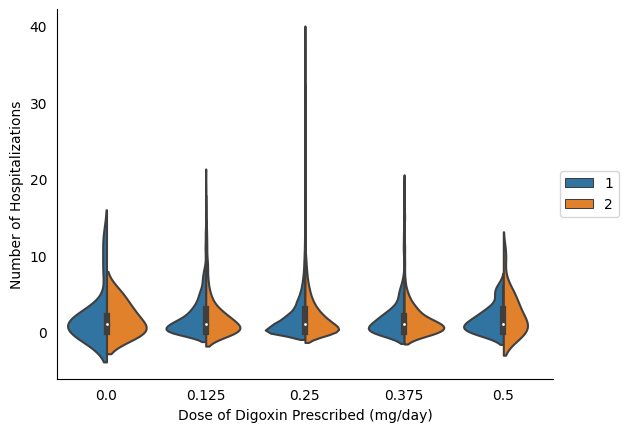

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.violinplot(data=df, x='DIGDOSE', y='NHOSP', hue='SEX', split=True, order=['0.0', '0.125', '0.25', '0.375', '0.5'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()
plt.tick_params(left= False, bottom= False)
plt.xlabel('Dose of Digoxin Prescribed (mg/day)')
plt.ylabel('Number of Hospitalizations')
plt.savefig('3.pdf', format='pdf', bbox_inches='tight')

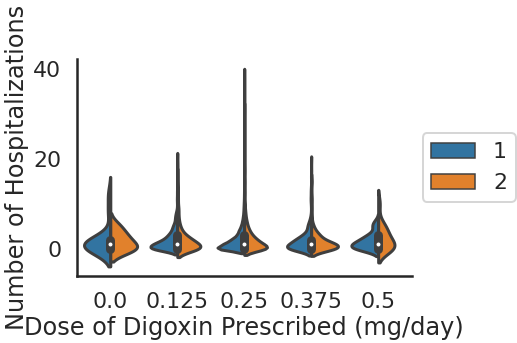

##**Rubric (10 points)**

**2 points**

Figure 1 matches and is exported.

---

**4 points**

Figure 2 matches and is exported.


---

**4 points**

Figure 3 matches and is exported.
